# U.S. Graduate School Application

In [80]:
#Last update: 2019/11/02
#Author: Yunyi(Iris) Ding
#Email:irisding20020213@outlook.com

In [81]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from copy import deepcopy

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,recall_score,roc_curve,precision_score,f1_score
from imblearn.over_sampling import SMOTE

# Step 1: Read data

In [82]:
data_dir= 'C:/Users/Apple/Desktop/data science/'

In [83]:
data_app_all=pd.read_excel(data_dir+'go_america_to_study_data_clean'+'.xlsx',
                            sheet_name='Raw')

In [84]:
data_app_all.head()

,申请学校,学位,专业,申请结果,入学年份,入学学期,通知时间,TOEFL,GRE,本科学校档次,本科专业,本科成绩和算法，排名,其他说明,url
0,Aalto University,PhD,Finance,offer,2016,Fall,2016-02-15,NaN,"Overall: 320, \n V: /\n ...",211 & 985,国贸,0.85,推荐信一封来自硕士论文导师，一封上课老师，一封本科论文导师。一段RA经历。弱背景，求轻拍,http://bbs.gter.net/forum.php?mod=viewthread&t...
1,Aarhus University,PhD,Economics and Econometrics,被拒,2016,Spring,2015-12-15,NaN,"Overall: 320, \n V: /\n ...",211 & 985,国贸,0.85,推荐信一封来自硕士论文导师，一封上课老师，一封本科论文导师。一段RA经历。弱背景，求轻拍,http://bbs.gter.net/forum.php?mod=viewthread&t...
2,Albert Einstein College of Medicine,RA,Biochemistry and Molecular Biology,offer,2016,Spring,2015-11-07,NaN,NaN,211,生物工程,排名60%,成绩很差，GPA不到3，科研的话有过UCSD的科研实习，在那里挂了一篇TOP期刊的论文，然后...,http://bbs.gter.net/forum.php?mod=viewthread&t...
3,American University,MA,International Economic Relations,AD小奖,2016,Fall,2016-03-03,"Overall: 105, \n R: 29 /\n ...","Overall: 327, \n V: 157 /\n...",NaN,Finance->Human Resource（不是双修，是转。。。）,3.62 (WES) / 4.0,工作与实习经验：有关部门实习一个月，较多的学生活动（MUN），一年社团负责人\n\n 推荐...,http://bbs.gter.net/forum.php?mod=viewthread&t...
4,American University,MA,Public Administration,被拒,2015,Fall,2015-04-01,"Overall: 103, \n R: 26 /\n ...","Overall: 315, \n V: 160 /\n...",211,汉语言文学,3.3,NaN,http://bbs.gter.net/forum.php?mod=viewthread&t...


In [85]:
data_app_all.shape

(12270, 14)

In [86]:
data_app_all.columns

Index(['申请学校', '学位', '专业', '申请结果', '入学年份', '入学学期', '通知时间', 'TOEFL', 'GRE',
       '本科学校档次', '本科专业', '本科成绩和算法，排名', '其他说明', 'url'],
      dtype='object')

In [87]:
data_app_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12270 entries, 0 to 12269
Data columns (total 14 columns):
申请学校          12270 non-null object
学位            12270 non-null object
专业            12270 non-null object
申请结果          12270 non-null object
入学年份          12270 non-null int64
入学学期          12270 non-null object
通知时间          12270 non-null object
TOEFL         10020 non-null object
GRE           8516 non-null object
本科学校档次        10725 non-null object
本科专业          11309 non-null object
本科成绩和算法，排名    10945 non-null object
其他说明          8550 non-null object
url           12270 non-null object
dtypes: int64(1), object(13)
memory usage: 1.3+ MB


In [88]:
data_app_all.describe(include='all')

,申请学校,学位,专业,申请结果,入学年份,入学学期,通知时间,TOEFL,GRE,本科学校档次,本科专业,本科成绩和算法，排名,其他说明,url
count,12270,12270,12270,12270,12270.000000,12270,12270,10020,8516,10725,11309,10945,8550,12270
unique,352,86,1422,4,NaN,3,607,1590,1247,208,884,1515,2025,4682
top,Columbia University,MS,Law,AD无奖,NaN,Fall,2015-03-13,"Overall: 97, \n R: /\n ...","Overall: 325, \n V: 155 /\n...",211 & 985,法学,AA,我的背景之前发过（更详细请参考其他帖子），不同的是后面刷了一个国内私募的实习，在里面做经济研...,http://bbs.gter.net/forum.php?mod=viewthread&t...
freq,401,2732,1668,5716,NaN,12021,272,85,121,2252,1696,297,63,17
mean,NaN,NaN,NaN,NaN,2015.069764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.594503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2 : Data Preparation

In [89]:
data_model=deepcopy(data_app_all)

In [90]:
# drop the url and "通知时间” columns which would are not useful for our program since that factor would not infleunce admission result
# Transform "其他说明“ column for the time being, no time for text mining.
data_model.drop(['url','通知时间'],axis=1,inplace=True)
# gtransform 其他说明only with binary result
data_model['others']=1
data_model.loc[data_model['其他说明'].isnull(),'others']=0
data_model.drop('其他说明',axis=1,inplace=True)

### 2.1. Rename Columns And Group Results

In [91]:
# The original names were all in Chinese, so I translated it into English to make it easier to understand

#the new columns names
col_dict=['app_school'
          ,'degree'
          ,'app_major'
          ,'result'
          ,'year'
          ,'semester'
          ,'TOEFL'
          ,'GRE'
          ,'ug_level'
          ,'ug_major'
          ,'ug_GPA'
          ,'others'     
         ]
#create a dictionary for the column renaming mapping
col_new_name=dict(zip(data_model.columns,col_dict))

#rename all the columns
data_model.rename(columns=col_new_name, inplace=True)

In [92]:
data_model.columns

Index(['app_school', 'degree', 'app_major', 'result', 'year', 'semester',
       'TOEFL', 'GRE', 'ug_level', 'ug_major', 'ug_GPA', 'others'],
      dtype='object')

In [93]:
data_model.head()

,app_school,degree,app_major,result,year,semester,TOEFL,GRE,ug_level,ug_major,ug_GPA,others
0,Aalto University,PhD,Finance,offer,2016,Fall,NaN,"Overall: 320, \n V: /\n ...",211 & 985,国贸,0.85,1
1,Aarhus University,PhD,Economics and Econometrics,被拒,2016,Spring,NaN,"Overall: 320, \n V: /\n ...",211 & 985,国贸,0.85,1
2,Albert Einstein College of Medicine,RA,Biochemistry and Molecular Biology,offer,2016,Spring,NaN,NaN,211,生物工程,排名60%,1
3,American University,MA,International Economic Relations,AD小奖,2016,Fall,"Overall: 105, \n R: 29 /\n ...","Overall: 327, \n V: 157 /\n...",NaN,Finance->Human Resource（不是双修，是转。。。）,3.62 (WES) / 4.0,1
4,American University,MA,Public Administration,被拒,2015,Fall,"Overall: 103, \n R: 26 /\n ...","Overall: 315, \n V: 160 /\n...",211,汉语言文学,3.3,0


In [94]:
data_model.result.value_counts(ascending=False)

AD无奖     5716
offer    2647
被拒       2114
AD小奖     1793
Name: result, dtype: int64

In [95]:
#group differnt admission result into 2 categories: 1 for admit and 0 for reject
# we group all the result like admission with no scholarship,direct admission and admission with scholarship into one catagory as"1" .
# For all the rejection result, we put the result as"0".
result_dict={ 'AD无奖':1,
             'offer':1,
             '被拒':0,
             'AD小奖':1    
}
data_model['result'].replace(result_dict,inplace=True)

In [96]:
data_model.result.value_counts(ascending=True)

0     2114
1    10156
Name: result, dtype: int64

### 2.2 N/A Value Rough Processing

More N/A value imputing will be included later when processing each columns one by one

In [97]:
data_model.isnull().sum()

app_school       0
degree           0
app_major        0
result           0
year             0
semester         0
TOEFL         2250
GRE           3754
ug_level      1545
ug_major       961
ug_GPA        1325
others           0
dtype: int64

In [98]:
# drop the row if all possible null entries are null
data_full=data_model.dropna(thresh=7) 
# same as data_full=data_model.dropna(how='all')

### 2.3. Standardize/Re-group data

### app_school

In [99]:
# find the most frequnet universities
data_model['app_school'].value_counts()[:20]

Columbia University                        401
University of Southern California          391
New York University                        362
University of Michigan - Ann Arbor         343
University of Illinois-Urbana-Champaign    324
Washington University in St. Louis         323
Georgetown University                      323
Boston University                          322
University of Pennsylvania                 306
Cornell University                         301
Vanderbilt University                      286
Duke University                            269
University of Texas - Austin               262
University of Wisconsin-Madison            249
University of Washington                   237
University of California-Berkeley          228
University of California-Los Angeles       225
Northwestern University                    217
University of Minnesota - Twin Cities      216
George Washington University               197
Name: app_school, dtype: int64

In [100]:
len(data_full['app_school'].unique())

352

In [101]:
# Import external dataset: US News Top 50 schools
# classifying into five bins to avoid the problem that all the universities data would be too sparse for any pattern especially for those less popular with small samples

school_ranking=pd.read_excel(data_dir+'US-News-Rankings-Universities-Through-2020.xlsx'
                            ,skiprows=1
                            ,parse_cols=[0,7,8,9,10]
                            )
school_ranking.columns=['University Name','rank_2016','rank_2015','rank_2014','rank_2013']

# Get the average rank for the past four years
school_ranking['year_avg']=school_ranking.mean(axis=1)

# Group ranking into five different bins
school_ranking.loc[school_ranking['year_avg']<=10,'rank_bin']=['top10']
school_ranking.loc[(school_ranking.year_avg>10)&(school_ranking.year_avg<=20),'rank_bin']=['11-20']
school_ranking.loc[(school_ranking.year_avg>20)&(school_ranking.year_avg<=30),'rank_bin']=['21-30']
school_ranking.loc[(school_ranking.year_avg>30)&(school_ranking.year_avg<=40),'rank_bin']=['31-40']
school_ranking.loc[(school_ranking.year_avg>40)&(school_ranking.year_avg<=50),'rank_bin']=['41-50']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead


In [102]:
school_ranking.head()

,University Name,rank_2016,rank_2015,rank_2014,rank_2013,year_avg,rank_bin
0,Princeton University,1.0,1.0,1.0,1.0,1.00,top10
1,Harvard University,2.0,2.0,2.0,1.0,1.75,top10
2,Columbia University,4.0,4.0,4.0,4.0,4.00,top10
3,Massachusetts Institute of Technology,7.0,7.0,7.0,6.0,6.75,top10
4,University of Chicago,4.0,4.0,5.0,4.0,4.25,top10


In [103]:
# merge school ranking with the full dataset
data_full=pd.merge(data_full,school_ranking[['University Name','rank_bin']]
                   ,how='left',left_on='app_school',right_on='University Name')
data_full.drop('University Name',axis=1,inplace=True)
data_full['rank_bin'].fillna('other',inplace=True)

In [104]:
#check the results
data_full['rank_bin'].value_counts()

other    5114
21-30    1786
top10    1560
41-50    1483
11-20    1400
31-40     927
Name: rank_bin, dtype: int64

### degree

In [105]:
data_full['degree'].value_counts(ascending=False)[:10]

MS      2732
MA      2694
PhD     2604
LLM     2375
MLA      569
JD       347
MEd      226
其它        89
Meng      88
MPP       81
Name: degree, dtype: int64

In [106]:
len(data_full['degree'].unique())

86

In [107]:
# There are too many unqiue majors, we organize the dataset and put them into the most frequnet 7 majors
data_full['degree_bin']='others'
data_full.loc[data_full['degree']=='MA','degree_bin']=['MA']
data_full.loc[data_full['degree']=='MS','degree_bin']=['MS']
data_full.loc[data_full['degree']=='PhD','degree_bin']=['PhD']
data_full.loc[data_full['degree']=='LLM','degree_bin']=['LLM']
data_full.loc[(data_full['degree']=='MLA')| (data_full['degree']=='mla'),'degree_bin']=['MLA']
data_full.loc[data_full['degree']=='JD','degree_bin']=['JD']
data_full.loc[data_full['degree']=='MEd','degree_bin']=['MEd']

In [108]:
# Check whether it has only 8 categories
data_full.degree_bin.unique()

array(['PhD', 'others', 'MA', 'LLM', 'MS', 'MEd', 'MLA', 'JD'],
      dtype=object)

### app_major

In [109]:
data_full.app_major.value_counts(ascending=False)[:20]

Law                                       1668
Economics and Econometrics                 891
Architecture                               573
Chemistry                                  497
Landscape Architecture                     408
US Law                                     382
Mechanical Engineering                     261
Chemical Engineering                       260
Electrical and Electronics Engineering     234
Computer Science                           213
Statistics                                 212
LLM                                        156
Public Policy Analysis                     151
Civil Engineering                          148
Public Administration                      148
Environmental Engineering                  146
Economics                                  126
Materials Engineering                      121
East Asian Languages and Literatures       116
法学                                         112
Name: app_major, dtype: int64

In [110]:
len(data_full.app_major.unique())

1422

In [111]:
#pd.DataFrame(data_full.app_major.unique()).to_csv('raw_major.csv')
# doing data cleaning and map the major
major_map=pd.read_excel(data_dir+'major_mapping.xlsx')

In [112]:
major_map.head()
# turing unqiue majors into more gnernal major classification like business, economy,biology,etc

,Original_major,major_mapping
0,Finance,Business
1,Economics and Econometrics,Economics
2,Biochemistry and Molecular Biology,Biology
3,International Economic Relations,Economics
4,Public Administration,Communication


In [113]:
len(major_map.major_mapping.unique())

18

In [114]:
# merge major mapping with the full dataset
data_full=pd.merge(data_full,major_map,how='left'
         ,left_on='app_major',right_on='Original_major'
         )
data_full.major_mapping.fillna('Other',inplace=True)
data_full.drop('Original_major',axis=1,inplace=True)

# transforming chinses character into English to regulate the format

data_full.loc[data_full['app_major'].str.contains('法',na=False),'major_mapping']='Law'
data_full.loc[data_full['app_major'].str.contains('建筑',na=False),'major_mapping']='Architecture'

### ug_level

In [115]:
data_full.ug_level.value_counts(ascending=False)[:10]

211 & 985                      2252
211                            1875
双非                             1700
浙大/复旦/南大/南开/武大/华中科大/上海交大/天大    1604
国内其他高校                          601
清华/北大/中科大                       471
中国人民大学                          201
中国农业大学                          141
华东政法大学                          111
国外高校（含港澳台）                       75
Name: ug_level, dtype: int64

In [116]:
#pd.DataFrame(data_full.ug_level.value_counts(ascending=False)).to_csv(data_dir+'scratch/ug_level.csv')
# After clean, import the mapping data
ug_level_mapping=pd.read_excel(data_dir+'ug_level_mapping.xlsx',sheetname='mapping')
ug_level_mapping.columns=['ug_level_name','cnt','ug_level_mapping']
ug_level_mapping.drop('cnt',axis=1,inplace=True)

//anaconda/lib/python3.5/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [117]:
# merge two datasets
data_full=pd.merge(data_full,ug_level_mapping,left_on='ug_level',right_on='ug_level_name',how='left')
data_full.drop('ug_level_name',axis=1,inplace=True)
data_full.ug_level_mapping.fillna('other',inplace=True)
data_full.ug_level_mapping.iloc[np.where(data_full.ug_level_mapping=="211")]=211

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [118]:
ug_level_mapping.head()

,ug_level_name,ug_level_mapping
0,211 & 985,985&211
1,211,211
2,双非,other
3,浙大/复旦/南大/南开/武大/华中科大/上海交大/天大,985&211
4,国内其他高校,211


### ug_GPA

In [119]:
data_full.ug_GPA.value_counts(ascending=False)[:10]

AA         297
3.5        151
3.7        115
87/100     111
3.2        107
3.4        100
85/100      92
3.5/4.0     90
3.8         82
3.6/4.0     71
Name: ug_GPA, dtype: int64

In [120]:
len(data_full.ug_GPA.value_counts(ascending=False))

1515

In [121]:
# import the mapping data
ug_gpa_mapping=pd.read_excel(data_dir+'ug_gpa_mapping.xlsx')
#fill those missing GPA values by using the mean value
ug_gpa_mapping.ug_gpa_mapping.fillna(value=ug_gpa_mapping.ug_gpa_mapping.mean(),inplace=True)

In [122]:
ug_gpa_mapping.head()

,original,break_1,break_2,ug_gpa_mapping
0,AA,AA,NaN,0.880
1,3.5,3.5,NaN,0.875
2,3.2,3.2,NaN,0.800
3,3.5/4.0,3.5,4,0.875
4,3.4,3.4,NaN,0.850


In [123]:
# merge two datasets
#need: ug_gpa_mapping
data_full=pd.merge(data_full,ug_gpa_mapping,left_on='ug_GPA',right_on='original',how='left')
#fill na value with mean value, if skewed, median might be a better method
data_full.ug_gpa_mapping.fillna(ug_gpa_mapping.ug_gpa_mapping.mean(),inplace=True)
data_full.drop(['break_1','break_2','original'],axis=1,inplace=True)

### 2.4 Special Data Processing

### GRE

In [124]:
data_full.GRE[10]

'Overall: 322, \n                    V: 155 /\n                    Q: 167 /\n                    AW: 3.5'

In [125]:
# #Split GRE score into separate entries
GRE_score=data_full.GRE.str.findall('\d*\.?\d+')
GRE_score.dropna(inplace=True)
# keep the index for later join
idx=GRE_score.index

GRE_list=GRE_score.tolist()
GRE_list=list(map(lambda x:list(float(i) for i in x),GRE_list))
GRE_list=pd.DataFrame(GRE_list)

#b/c of some bad data
GRE_list.drop(GRE_list.columns[[4,5,6,7]],axis=1,inplace=True)

#keep the original index for later data consolidation
GRE_list.set_index(idx,inplace=True)
GRE_parts=['GRE_all','GRE_V','GRE_Q','AW']
GRE_list.columns=GRE_parts

In [126]:
GRE_list.head()

,GRE_all,GRE_V,GRE_Q,AW
0,320.0,NaN,NaN,NaN
1,320.0,NaN,NaN,NaN
3,327.0,157.0,170.0,3.0
4,315.0,160.0,155.0,3.0
6,309.0,150.0,159.0,4.5


In [127]:
#GRE old scores and no total scores
GRE_old_nt=GRE_list[(GRE_list.GRE_all>340)&(GRE_list.GRE_all<=800)]

GRE_old_nt['temp']=GRE_old_nt[['GRE_all','GRE_V']].sum(axis=1)
GRE_old_nt['AW']=GRE_old_nt['GRE_Q']
GRE_old_nt.drop('GRE_Q',axis=1,inplace=True)
GRE_old_nt.columns=['GRE_V','GRE_Q','AW','GRE_all']
GRE_old_nt=GRE_old_nt[['GRE_all','GRE_V','GRE_Q','AW']]

#replace mismatched rows with cleaned score
GRE_list.loc[GRE_old_nt.index,['GRE_all','GRE_V','GRE_Q','AW']]=GRE_old_nt

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [128]:
# using coversion form to convert the old score into new score

GRE_V=pd.read_excel(data_dir+'GRE_conversion.xlsx', sheet_name='Verbal')
GRE_Q=pd.read_excel(data_dir+'GRE_conversion.xlsx', sheet_name='Quant')
GRE_cvt=pd.concat([GRE_V,GRE_Q],axis=1)
GRE_cvt=GRE_cvt.astype(float)

In [129]:
GRE_cvt.head()

,Old_V,New_V,Old_Q,New_Q
0,800.0,170.0,800.0,166.0
1,790.0,170.0,790.0,164.0
2,780.0,170.0,780.0,163.0
3,770.0,170.0,770.0,161.0
4,760.0,170.0,760.0,160.0


In [130]:
#now all old score are of the standard format, convert it to new score scale
GRE_old_total=GRE_list[(GRE_list.GRE_all>800)]

In [131]:
GRE_old_total.head()

,GRE_all,GRE_V,GRE_Q,AW
89,1350.0,550.0,800.0,3.0
93,1170.0,380.0,790.0,3.5
105,1350.0,560.0,790.0,3.5
380,1490.0,NaN,NaN,NaN
512,1460.0,660.0,800.0,4.0


In [132]:
GRE_old_total=pd.merge(GRE_old_total.reset_index(),GRE_cvt[['Old_V','New_V']],left_on='GRE_V',right_on='Old_V',how='left').set_index('index')
GRE_old_total=pd.merge(GRE_old_total.reset_index(),GRE_cvt[['Old_Q','New_Q']],left_on='GRE_Q',right_on='Old_Q',how='left').set_index('index')
GRE_old_total.drop(['GRE_V','GRE_Q','Old_V','Old_Q','GRE_all'],axis=1,inplace=True)
GRE_old_total['GRE_all']=GRE_old_total['New_V']+GRE_old_total['New_Q']
GRE_old_total.columns=['AW','GRE_V','GRE_Q','GRE_all']
GRE_old_total=GRE_old_total[['GRE_all','GRE_V','GRE_Q','AW']]

#replace old GRE score with new score
GRE_list.loc[GRE_old_total.index,['GRE_all','GRE_V','GRE_Q','AW']]=GRE_old_total

In [133]:
# GRE new score
# mimic the GRE_old_nt

GRE_new_nt=GRE_list[(GRE_list.GRE_all<=170)]

GRE_new_nt['temp']=GRE_new_nt[['GRE_all','GRE_V']].sum(axis=1)
GRE_new_nt['AW']=GRE_new_nt['GRE_Q']
GRE_new_nt.drop('GRE_Q',axis=1,inplace=True)
GRE_new_nt.columns=['GRE_V','GRE_Q','AW','GRE_all']
GRE_new_nt=GRE_new_nt[['GRE_all','GRE_V','GRE_Q','AW']]

#replace mismatched rows with cleaned score
GRE_list.loc[GRE_new_nt.index,['GRE_all','GRE_V','GRE_Q','AW']]=GRE_new_nt

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [134]:
# merge two datasets
#need: GRE_all,GRE_V,GRE_Q,AW
#join with index
data_full=pd.merge(data_full,GRE_list,left_index=True,right_index=True,how='left')

In [135]:
# fill N/A score with average score,respectively. However, if the original score is NA, do NOT fill it (JD & LLM student)
gre_not_all_null=(~data_full['GRE'].isnull())
oor_all=(data_full['GRE_all']>340)|(data_full['GRE_all']<170)
oor_q=(data_full['GRE_Q']>170)|(data_full['GRE_Q']<100)
oor_v=(data_full['GRE_V']>170)|(data_full['GRE_V']<100)

data_full['GRE_all']=np.where(gre_not_all_null&((data_full['GRE_all'].isnull())|oor_all),data_full.GRE_all.mean(),data_full.GRE_all)
data_full['GRE_Q']=np.where(gre_not_all_null&((data_full['GRE_Q'].isnull())|oor_q),data_full.GRE_Q.mean(),data_full.GRE_Q)
data_full['GRE_V']=np.where(gre_not_all_null&((data_full['GRE_V'].isnull())|oor_v),data_full.GRE_V.mean(),data_full.GRE_V)

### TOEFL

In [136]:
data_full.TOEFL[13]

'Overall: 116, \n                    R: 29 /\n                    L: 29 /\n                    S: 29 /\n                    W: 29'

In [137]:
# #Split TOEFL score into separate entries
TOEFL_score=data_full.TOEFL.str.findall('\d*\.?\d+')
TOEFL_score.dropna(how='all',inplace=True)
idy=TOEFL_score.index
TOEFL_list=TOEFL_score.tolist()
TOEFL_list=list(map(lambda x:list(float(i) for i in x),TOEFL_score))
TOEFL_list=pd.DataFrame(TOEFL_list)

# drop outliers
TOEFL_list.drop(TOEFL_list.columns[[5,6,7,8,9]],axis=1,inplace=True)

#keep the original index for later data consolidation
TOEFL_list.set_index(idy,inplace=True)
TOEFL_parts=['TOEFL_all','TOEFL_R','TOEFL_L','TOEFL_S','TOEFL_W']
TOEFL_list.columns=TOEFL_parts

In [138]:
TOEFL_list.head()

,TOEFL_all,TOEFL_R,TOEFL_L,TOEFL_S,TOEFL_W
3,105.0,29.0,29.0,20.0,27.0
4,103.0,26.0,29.0,20.0,28.0
5,100.0,29.0,24.0,22.0,25.0
6,NaN,NaN,NaN,NaN,NaN
7,107.0,26.0,27.0,26.0,28.0


#### Adjust TOEFL w/o total score

In [139]:
oor_r=(TOEFL_list['TOEFL_R']>30)|(TOEFL_list['TOEFL_R']<10)
oor_l=(TOEFL_list['TOEFL_L']>30)|(TOEFL_list['TOEFL_L']<10)
oor_s=(TOEFL_list['TOEFL_S']>30)|(TOEFL_list['TOEFL_S']<10)
oor_w=(TOEFL_list['TOEFL_W']>30)|(TOEFL_list['TOEFL_W']<10)
oor_toefl_all=(TOEFL_list['TOEFL_all']>120)|(TOEFL_list['TOEFL_all']<40)
toefl_all_na=data_full['TOEFL'].isnull()

In [140]:
TOEFL_list[oor_toefl_all].head()

,TOEFL_all,TOEFL_R,TOEFL_L,TOEFL_S,TOEFL_W
82,26.0,25.0,22.0,21.0,NaN
83,26.0,24.0,22.0,27.0,NaN
84,27.0,26.0,23.0,24.0,NaN
86,26.0,27.0,22.0,27.0,NaN
87,28.0,22.0,22.0,25.0,NaN


In [141]:
# mimic GRE_old_nt
TOEFL_nt=TOEFL_list[oor_toefl_all]

TOEFL_nt['temp']=TOEFL_nt[['TOEFL_all','TOEFL_R','TOEFL_L','TOEFL_S']].sum(axis=1)
TOEFL_nt['TOEFL_R']=TOEFL_nt['TOEFL_L']
TOEFL_nt.drop('TOEFL_W',inplace=True,axis=1)
TOEFL_nt.columns=['TOEFL_R','TOEFL_L','TOEFL_S','TOEFL_W','TOEFL_all']
TOEFL_nt=TOEFL_nt[['TOEFL_all','TOEFL_R','TOEFL_L','TOEFL_S','TOEFL_W']]

#replace mismatched rows with cleaned score
TOEFL_list.loc[TOEFL_nt.index,['TOEFL_all','TOEFL_R','TOEFL_L','TOEFL_S','TOEFL_W']]=TOEFL_nt

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [142]:
#fill the missing values with mean value
# mean would be a strong representation for the situation that there is not so many outliers
TOEFL_list['TOEFL_all']=np.where((TOEFL_list['TOEFL_all'].isnull())|((TOEFL_list['TOEFL_all']>120)|(TOEFL_list['TOEFL_all']<40))
                                 ,TOEFL_list.TOEFL_all.mean(),TOEFL_list.TOEFL_all)
TOEFL_list['TOEFL_R']=np.where(((TOEFL_list['TOEFL_R'].isnull())|(oor_r))
                                 ,TOEFL_list.TOEFL_R.mean(),TOEFL_list.TOEFL_R)
TOEFL_list['TOEFL_L']=np.where(((TOEFL_list['TOEFL_L'].isnull())|(oor_l))
                                 ,TOEFL_list.TOEFL_L.mean(),TOEFL_list.TOEFL_L)
TOEFL_list['TOEFL_S']=np.where(((TOEFL_list['TOEFL_S'].isnull())|(oor_s))
                                 ,TOEFL_list.TOEFL_S.mean(),TOEFL_list.TOEFL_S)
TOEFL_list['TOEFL_W']=np.where(((TOEFL_list['TOEFL_W'].isnull())|(oor_w))
                                 ,TOEFL_list.TOEFL_W.mean(),TOEFL_list.TOEFL_W)

In [143]:
# merge two datasets
#need: 'TOEFL_all','TOEFL_R','TOEFL_L','TOEFL_S','TOEFL_W'
#join with index
data_full=pd.merge(data_full,TOEFL_list,left_index=True,right_index=True,how='left')

In [144]:
#drop duplicated rows
data_full.drop_duplicates(inplace=True)
# see duplicated rows
# data_model[data_model.duplicated()].sort_values(by='app_school')

In [145]:
# the data shows that GRE missing is NOT random (but for simplicity we will treat it as random for now)
# there is a pattern between the missing GRE grades and the slection of major(like students with major law took other tests to prove their acedemic performance instead of taking GRE)
data_full[data_full.GRE_all.isnull()].app_major.value_counts()[:20]

Law                               665
US Law                            162
LLM                                92
法学                                 56
Economics and Econometrics         41
Finance                            27
Social Work and Youth Services     25
Landscape Architecture             25
Accounting                         25
Computer Science                   25
Intellectual Property Law          21
JD                                 21
Mechanical Engineering             16
Public Administration              16
Statistics                         16
Architecture                       15
law                                14
Public Policy Analysis             14
Civil Engineering                  13
general                            12
Name: app_major, dtype: int64

In [147]:
data_full.shape

(8564, 26)

In [148]:
# logistic model is not the best practice when deading with huge-missing data scenario 
# should handle if differntly using other models like random forest that will enhance the performance of the overall model
# for logistic regression, filling null TOEFL and GRE with mean value
# do not fill it inplace, as we obvserve above that app_major may impact it (not independent)
data_full['GRE_all_filled']=data_full.GRE_all.fillna(data_full.GRE_all.mean())
data_full['GRE_V_filled']=data_full.GRE_V.fillna(data_full.GRE_V.mean())
data_full['GRE_Q_filled']=data_full.GRE_Q.fillna(data_full.GRE_Q.mean())

data_full['TOEFL_all_filled']=data_full.TOEFL_all.fillna(data_full.TOEFL_all.mean())
data_full['TOEFL_R_filled']=data_full.TOEFL_R.fillna(data_full.TOEFL_R.mean())
data_full['TOEFL_L_filled']=data_full.TOEFL_L.fillna(data_full.TOEFL_L.mean())
data_full['TOEFL_S_filled']=data_full.TOEFL_S.fillna(data_full.TOEFL_S.mean())
data_full['TOEFL_W_filled']=data_full.TOEFL_W.fillna(data_full.TOEFL_W.mean())

In [149]:
data_full.head()

,app_school,degree,app_major,result,year,semester,TOEFL,GRE,ug_level,ug_major,...,TOEFL_S,TOEFL_W,GRE_all_filled,GRE_V_filled,GRE_Q_filled,TOEFL_all_filled,TOEFL_R_filled,TOEFL_L_filled,TOEFL_S_filled,TOEFL_W_filled
0,Aalto University,PhD,Finance,1,2016,Fall,NaN,"Overall: 320, \n V: /\n ...",211 & 985,国贸,...,NaN,NaN,320.000000,151.135514,166.857154,101.995031,27.736209,25.891469,22.793064,25.533389
1,Aarhus University,PhD,Economics and Econometrics,0,2016,Spring,NaN,"Overall: 320, \n V: /\n ...",211 & 985,国贸,...,NaN,NaN,320.000000,151.135514,166.857154,101.995031,27.736209,25.891469,22.793064,25.533389
2,Albert Einstein College of Medicine,RA,Biochemistry and Molecular Biology,1,2016,Spring,NaN,NaN,211,生物工程,...,NaN,NaN,320.418005,153.599506,166.829709,101.995031,27.736209,25.891469,22.793064,25.533389
3,American University,MA,International Economic Relations,1,2016,Fall,"Overall: 105, \n R: 29 /\n ...","Overall: 327, \n V: 157 /\n...",NaN,Finance->Human Resource（不是双修，是转。。。）,...,20.0,27.0,327.000000,157.000000,170.000000,105.000000,29.000000,29.000000,20.000000,27.000000
4,American University,MA,Public Administration,0,2015,Fall,"Overall: 103, \n R: 26 /\n ...","Overall: 315, \n V: 160 /\n...",211,汉语言文学,...,20.0,28.0,315.000000,160.000000,155.000000,103.000000,26.000000,29.000000,20.000000,28.000000


### 2.5 Plotting: Exploratory Analysis

In [150]:
var_list=['result'
            ,'app_school'
#             , 'degree'
#             ,'app_major'
            , 'year'
            , 'semester'
#             ,'TOEFL'
#             , 'GRE'
#             , 'ug_level'
#             , 'ug_major'
#             , 'ug_GPA'
            , 'others'
            , 'rank_bin'
            ,'degree_bin'
            , 'major_mapping'
            , 'ug_level_mapping'
            , 'ug_gpa_mapping'
            ,'GRE_all'
            , 'GRE_V'
            , 'GRE_Q'
#             , 'AW'
            , 'TOEFL_all'
            , 'TOEFL_R'
            , 'TOEFL_L'
            ,'TOEFL_S'
            , 'TOEFL_W']

In [151]:
data_full[var_list].describe(include='all')

,result,app_school,year,semester,others,rank_bin,degree_bin,major_mapping,ug_level_mapping,ug_gpa_mapping,GRE_all,GRE_V,GRE_Q,TOEFL_all,TOEFL_R,TOEFL_L,TOEFL_S,TOEFL_W
count,8564.000000,8564,8564.000000,8564,8564.000000,8564,8564,8564,8564,8564.000000,6561.000000,6561.000000,6561.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000
unique,NaN,352,NaN,3,NaN,6,8,18,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Columbia University,NaN,Fall,NaN,other,MS,Engineering,985&211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,280,NaN,8362,NaN,3845,2248,1668,4032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.819477,NaN,2015.067842,NaN,0.671649,NaN,NaN,NaN,NaN,0.870820,320.418005,153.599506,166.829709,101.995031,27.736209,25.891469,22.793064,25.533389
std,0.384645,NaN,0.689046,NaN,0.469641,NaN,NaN,NaN,NaN,0.054455,7.942337,5.203122,3.528078,7.196503,2.130210,2.941800,2.260755,2.272319
min,0.000000,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.481538,172.000000,107.000000,142.000000,74.000000,15.000000,13.000000,14.000000,17.000000
25%,1.000000,NaN,2015.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.870000,317.000000,151.000000,166.000000,98.000000,27.000000,24.000000,22.000000,24.000000
50%,1.000000,NaN,2015.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.870565,321.000000,153.000000,167.000000,103.000000,28.000000,26.296014,22.974098,25.668731
75%,1.000000,NaN,2015.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.890000,325.000000,157.000000,170.000000,107.000000,29.000000,28.000000,24.000000,27.000000


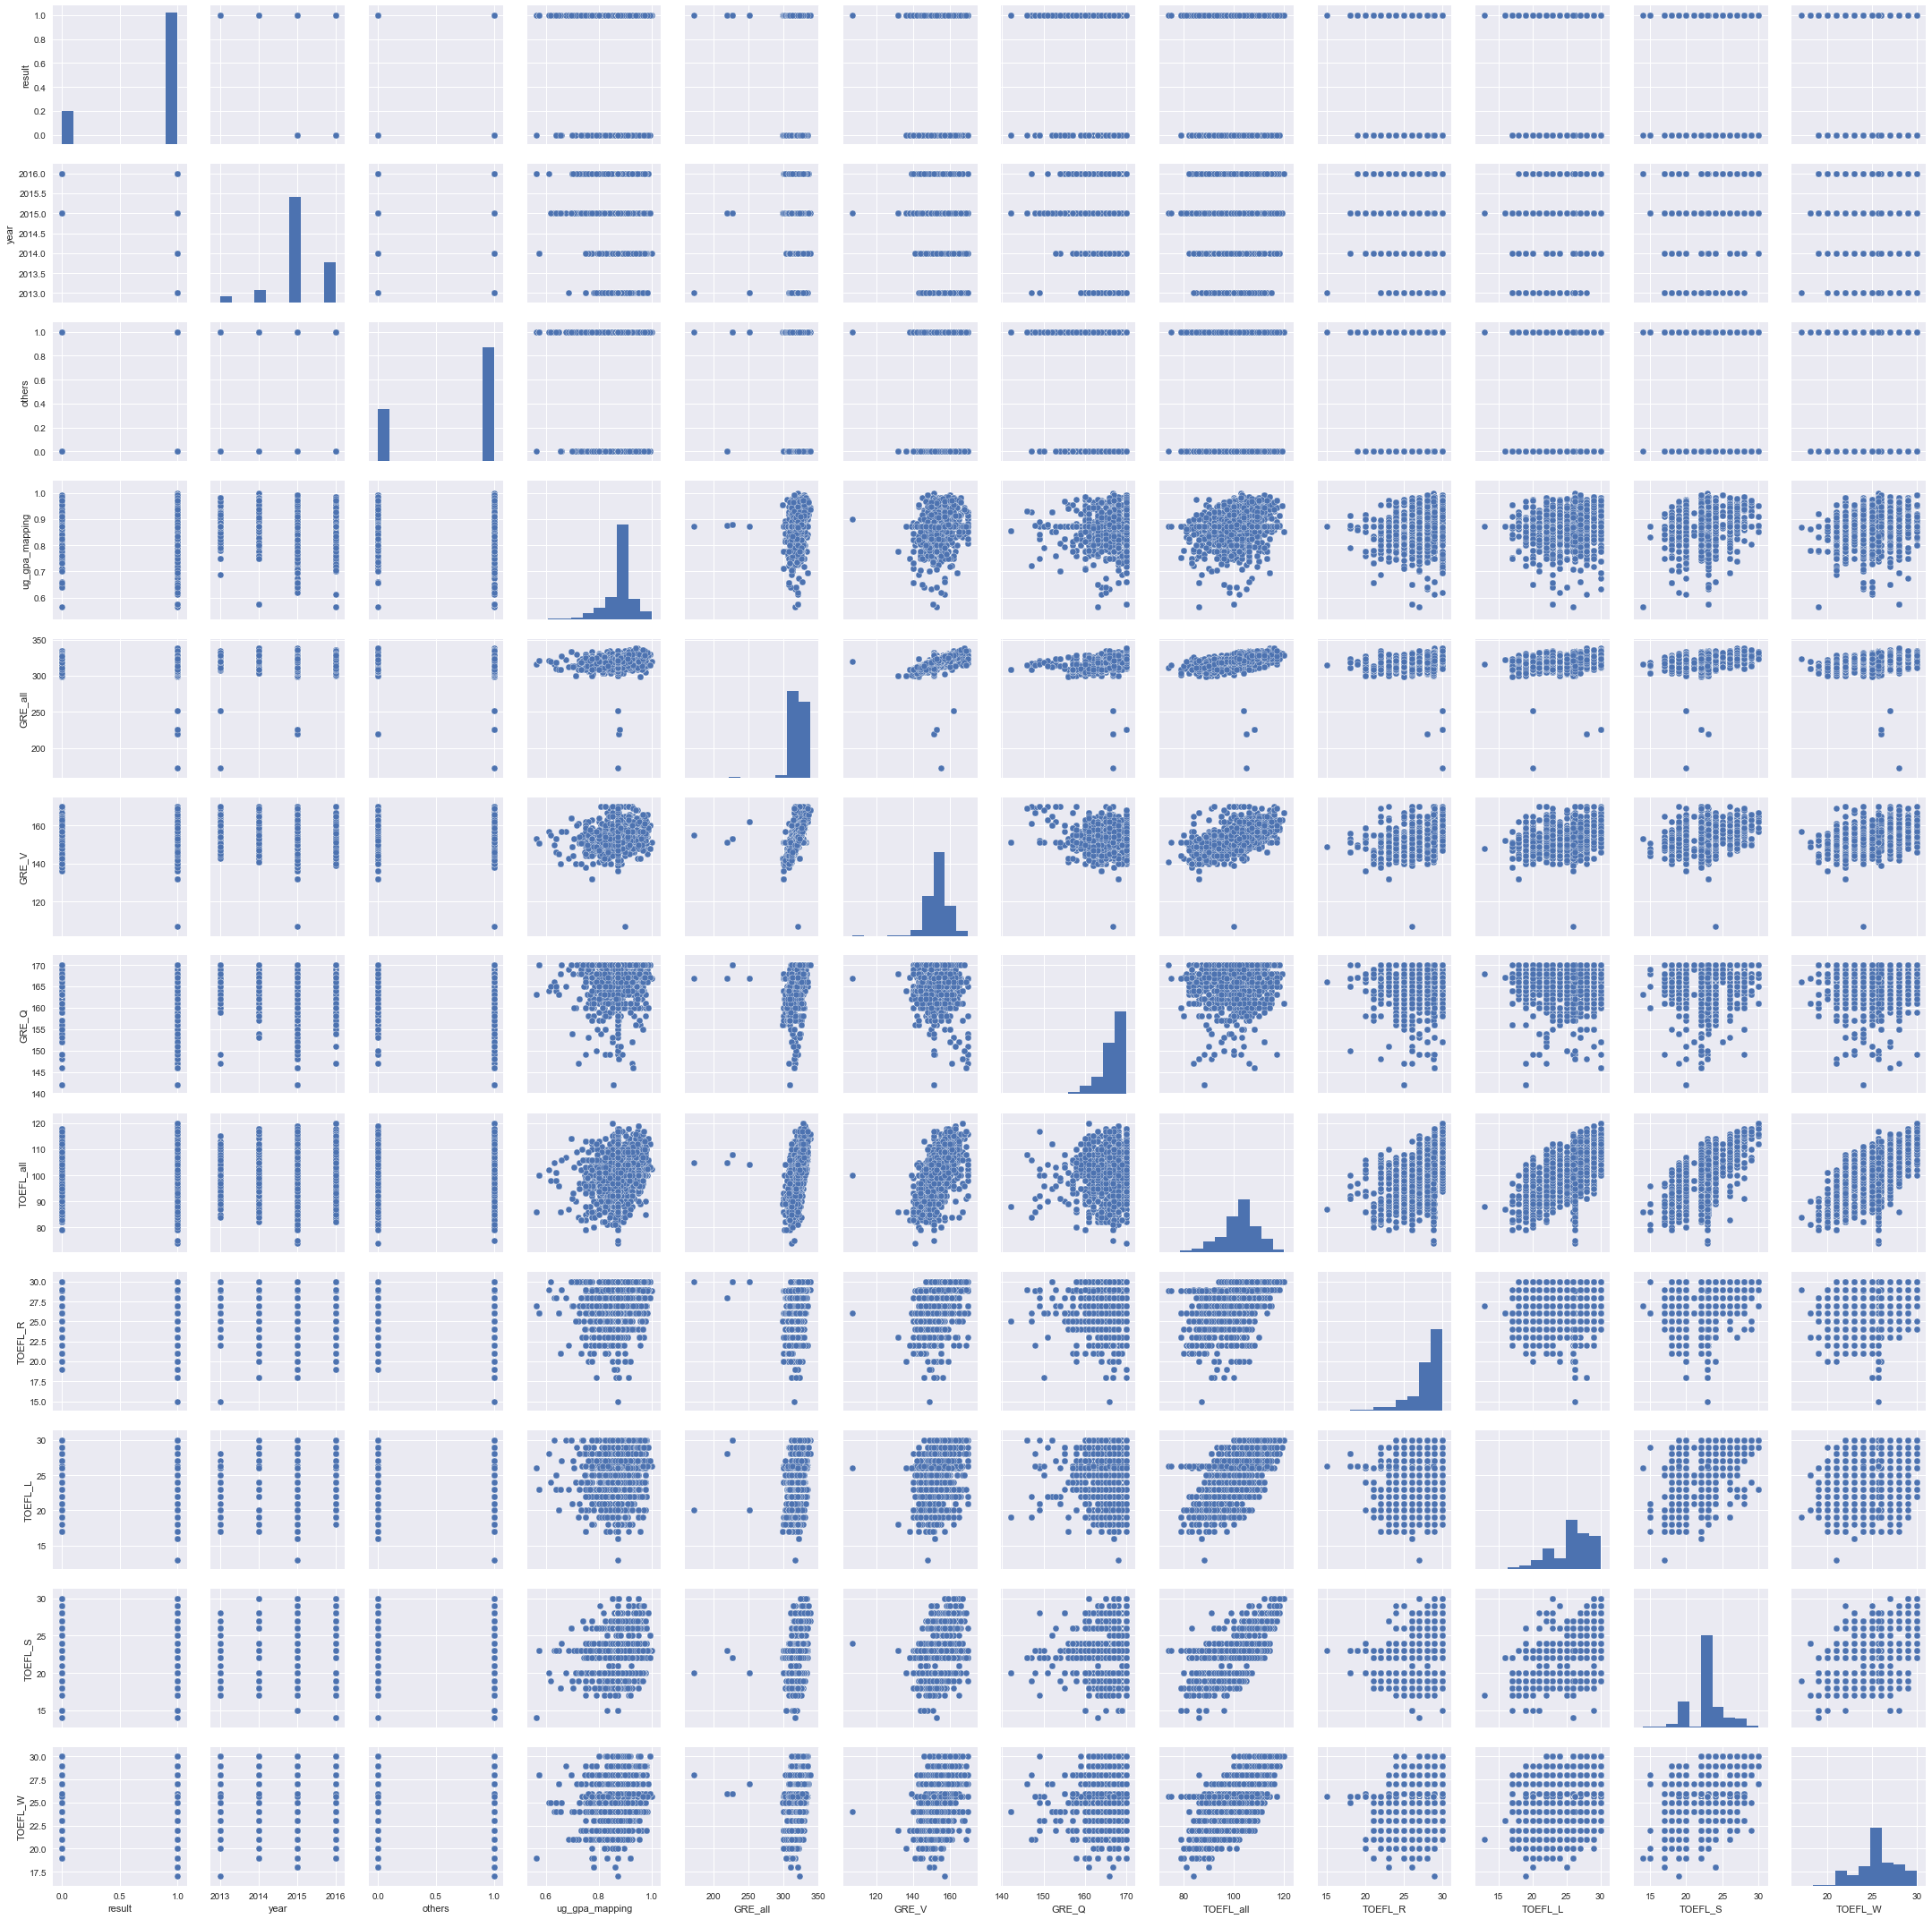

In [152]:
sns.set()
# pp=sns.pairplot(data_full[var_list].dropna(), hue="result",size=2.5)
pp=sns.pairplot(data_full[var_list].dropna(),size=2.5)

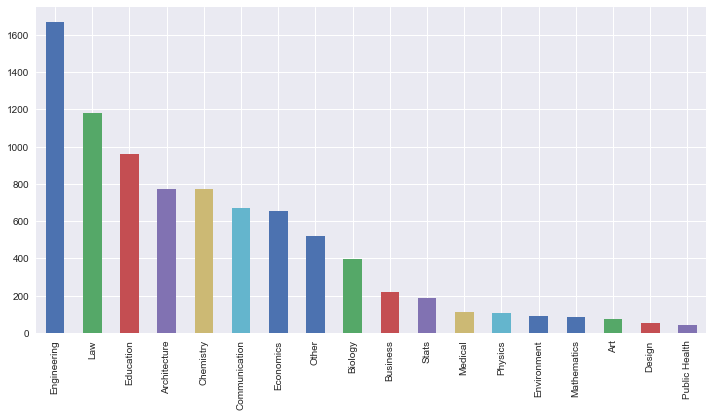

In [153]:
data_full.major_mapping.value_counts().plot.bar(figsize=(12,6))

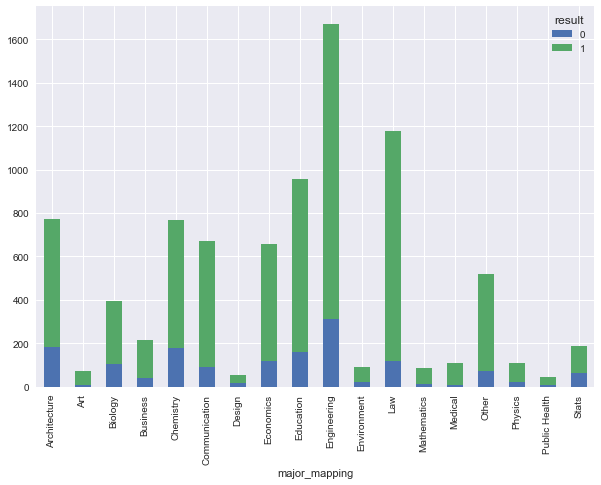

In [154]:
#relationship between major and rank vs.result
major_rank_result=pd.pivot_table(data=data_full, index='major_mapping',columns='result',values='rank_bin'
                ,aggfunc='count').plot.bar(stacked=True, figsize=(10,7))

### 2.6 Outlier Dropping

In [155]:
# detecting and droping the outlier of the varibale Year 
data_full.year.value_counts(ascending=False)

2015    5559
2016    1975
2014     669
2013     359
2012       1
2011       1
Name: year, dtype: int64

In [156]:
# 2011 and 2012 seem to be wrong data so we drop them
data_full.drop(data_full[data_full['year']<2013].index,axis=0,inplace=True)

In [157]:
# Based on the scatter plot above,drop extremely low scores
data_full.drop(data_full[data_full['GRE_all']<250].index,axis=0,inplace=True)
data_full.drop(data_full[data_full['GRE_V']<120].index,axis=0,inplace=True)

# Step 3: Modeling

In [158]:
# Logistic regression is not good at handeling huge missing values. We fill the missing values with the missing value since mean could be a good representation when there are so many outliers.  
# A better way could be used in hadeling this situation when there are not so much missing values(random forest)
# with some special value and then create a indicator column to account for it

# we exclude GRE_V_filled and TOEFL_R_filled to avoid the dummy trap
feature_list_L=[
#             'app_school'
#             , 'degree'
#             ,'app_major'
             'year'
            , 'semester'
#             ,'TOEFL'
#             , 'GRE'
#             , 'ug_level'
#             , 'ug_major'
#             , 'ug_GPA'
            , 'others'
            , 'rank_bin'
            ,'degree_bin'
            , 'major_mapping'
            , 'ug_level_mapping'
            , 'ug_gpa_mapping'
#             ,'GRE_all'
#             , 'GRE_V'
#             , 'GRE_Q'
# #             , 'AW'
#             , 'TOEFL_all'
#             , 'TOEFL_R'
#             , 'TOEFL_L'
#             ,'TOEFL_S'
#             , 'TOEFL_W'
             ,'GRE_all_filled'
#             ,'GRE_V_filled'
            ,'GRE_Q_filled'
            ,'TOEFL_all_filled'
#             ,'TOEFL_R_filled'
            ,'TOEFL_L_filled'
            ,'TOEFL_S_filled'
            ,'TOEFL_W_filled'
]

In [159]:
#Check all null values have been filled
data_full[feature_list_L].isnull().sum()

year                0
semester            0
others              0
rank_bin            0
degree_bin          0
major_mapping       0
ug_level_mapping    0
ug_gpa_mapping      0
GRE_all_filled      0
GRE_Q_filled        0
TOEFL_all_filled    0
TOEFL_L_filled      0
TOEFL_S_filled      0
TOEFL_W_filled      0
dtype: int64

### 3.1.One-hot encoding

In [160]:
data_full[feature_list_L].head()

,year,semester,others,rank_bin,degree_bin,major_mapping,ug_level_mapping,ug_gpa_mapping,GRE_all_filled,GRE_Q_filled,TOEFL_all_filled,TOEFL_L_filled,TOEFL_S_filled,TOEFL_W_filled
0,2016,Fall,1,other,PhD,Business,985&211,0.850000,320.000000,166.857154,101.995031,25.891469,22.793064,25.533389
1,2016,Spring,1,other,PhD,Economics,985&211,0.850000,320.000000,166.857154,101.995031,25.891469,22.793064,25.533389
2,2016,Spring,1,other,others,Biology,211,0.870565,320.418005,166.829709,101.995031,25.891469,22.793064,25.533389
3,2016,Fall,1,other,MA,Economics,other,0.870565,327.000000,170.000000,105.000000,29.000000,20.000000,27.000000
4,2015,Fall,0,other,MA,Communication,211,0.825000,315.000000,155.000000,103.000000,29.000000,20.000000,28.000000


In [161]:
feature_L=pd.get_dummies(data_full[feature_list_L])
yr=pd.get_dummies(feature_L['year'])
yr.columns=['year_2013','year_2014','year_2015','year_16']
feature_L=pd.merge(feature_L,yr,how='left',left_index=True,right_index=True)
feature_L.head()

,year,others,ug_gpa_mapping,GRE_all_filled,GRE_Q_filled,TOEFL_all_filled,TOEFL_L_filled,TOEFL_S_filled,TOEFL_W_filled,semester_Fall,...,major_mapping_Public Health,major_mapping_Stats,ug_level_mapping_211,ug_level_mapping_985&211,ug_level_mapping_other,ug_level_mapping_oversea,year_2013,year_2014,year_2015,year_16
0,2016,1,0.850000,320.000000,166.857154,101.995031,25.891469,22.793064,25.533389,1,...,0,0,0,1,0,0,0,0,0,1
1,2016,1,0.850000,320.000000,166.857154,101.995031,25.891469,22.793064,25.533389,0,...,0,0,0,1,0,0,0,0,0,1
2,2016,1,0.870565,320.418005,166.829709,101.995031,25.891469,22.793064,25.533389,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,1,0.870565,327.000000,170.000000,105.000000,29.000000,20.000000,27.000000,1,...,0,0,0,0,1,0,0,0,0,1
4,2015,0,0.825000,315.000000,155.000000,103.000000,29.000000,20.000000,28.000000,1,...,0,0,1,0,0,0,0,0,1,0


### 3.2 Variable Preparation

In [162]:
#update the feature_list_L to include dummies

#list(feature_L.columns)

# The initially dropped columns are used to avoid dummy trap.

feature_list_L=[
#     'year',
    'year_2013',
    'year_2014',
    'year_2015',
#     'year_2016',
 'others',
 'ug_gpa_mapping',
 'GRE_all_filled',
 'GRE_Q_filled',
 'TOEFL_all_filled',
 'TOEFL_L_filled',
 'TOEFL_S_filled',
 'TOEFL_W_filled',
 'semester_Fall',
 'semester_Spring',
#  'semester_Summer',
 'rank_bin_11-20',
#  'rank_bin_21-30',
 'rank_bin_31-40',
 'rank_bin_41-50',
 'rank_bin_other',
 'rank_bin_top10',
 'degree_bin_JD',
#  'degree_bin_LLM',
 'degree_bin_MA',
 'degree_bin_MEd',
 'degree_bin_MLA',
 'degree_bin_MS',
 'degree_bin_PhD',
 'degree_bin_others',
 'major_mapping_Architecture',
 'major_mapping_Art',
 'major_mapping_Biology',
 'major_mapping_Business',
#  'major_mapping_Chemistry',
 'major_mapping_Communication',
 'major_mapping_Design',
 'major_mapping_Economics',
 'major_mapping_Education',
 'major_mapping_Engineering',
 'major_mapping_Environment',
 'major_mapping_Law',
 'major_mapping_Mathematics',
 'major_mapping_Medical',
 'major_mapping_Other',
 'major_mapping_Physics',
 'major_mapping_Public Health',
 'major_mapping_Stats',
#  'ug_level_mapping_211',
 'ug_level_mapping_985&211',
 'ug_level_mapping_other',
 'ug_level_mapping_oversea'    
]

In [163]:
#response variable
y=data_full[['result']]

# column names of features
fea_name=feature_list_L

#feature dataset
feature=feature_L[fea_name]

In [166]:
# Feature Standardization to make sure all the statistics are in the same scale
from sklearn import preprocessing as pp
scale_var=['GRE_all_filled',
           'GRE_Q_filled',
           'TOEFL_all_filled',
           'TOEFL_L_filled',
           'TOEFL_S_filled',
           'TOEFL_W_filled']
#use min-max scaler to keep the original distribution
mm_scaler=pp.MinMaxScaler()
X_mm_scale=mm_scaler.fit_transform(feature[scale_var])

# make it a dataframe and rename the columns

scale_feature=pd.DataFrame(X_mm_scale)
scale_feature.columns=['GRE_all_filled_s',
                       'GRE_Q_filled_s',
                       'TOEFL_all_filled_s',
                       'TOEFL_L_filled_s',
                       'TOEFL_S_filled_s',
                       'TOEFL_W_filled_s' ]

#reset index for feature, so that we can merge two dataset easily
feature.reset_index(inplace=True)
feature.drop('index',axis=1,inplace=True)

//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [167]:
#merge with the original modeling dataset.
feature=pd.merge(feature,scale_feature,left_index=True,right_index=True,how='inner')

In [168]:
# calibrate the model using standardized data
feature_new=feature.drop(scale_var,axis=1)

In [169]:
#response variable
y=data_full[['result']]

# column names of features
fea_name=feature_list_L

#feature dataset
feature=feature_L[fea_name]

In [170]:
y.head()

,result
0,1
1,0
2,1
3,1
4,0


### 3.3 Train-test split

In [171]:
train_x,test_x,train_y,test_y=train_test_split(feature_new,y,test_size=0.2,random_state=531)

### 3.4 Over-sampleing

In [187]:
# this is an extra step to handle imbalanced dataset. 
# It oversample the minor class which is "geting rejected " because of the slection bias
oversample=SMOTE(random_state=531)
os_X,os_y=oversample.fit_sample(train_x,train_y['result'])
os_X=pd.DataFrame(data=os_X,columns=train_x.columns)
os_y=pd.DataFrame(data=os_y,columns=['result'])

In [188]:
#check to see whether the dataset balanced
os_y.result.value_counts()

1    5593
0    5593
Name: result, dtype: int64

### 3.5 baseline model setup

In [189]:
#baseline model
# we set base- line model to compare with the pricted model
# we set the situation based on the true condition that everyone could be admitted by the universities
y_base=np.ones(test_y.shape)

### 3.6 recursive feature elimination

In [190]:
# slecting feature ranking with recursive feature elimination
# the purpose of recursive feature elimination is to keep strong-corelated feature and get rid of weak features
#recursive feature elimination slect strong corelate feature until all the good feature were selected
# please read more here:# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html 
from sklearn.feature_selection import RFE
logreg=LR(solver='liblinear')
#choose 25 variables out of 45
rfe=RFE(logreg,25)
# rfe=rfe.fit(train_x,train_y)
rfe=rfe.fit(os_X,os_y.values.ravel())

In [191]:
# the selected variables based on rfe
selected_col=list(np.array(feature_new.columns)[np.array(rfe.support_)])
train_os_x_rfe=os_X[selected_col]

In [192]:
selected_col

['year_2013',
 'year_2014',
 'ug_gpa_mapping',
 'semester_Fall',
 'semester_Spring',
 'rank_bin_11-20',
 'rank_bin_31-40',
 'rank_bin_41-50',
 'rank_bin_other',
 'rank_bin_top10',
 'degree_bin_MA',
 'degree_bin_MEd',
 'degree_bin_MLA',
 'degree_bin_MS',
 'degree_bin_PhD',
 'degree_bin_others',
 'major_mapping_Art',
 'major_mapping_Biology',
 'major_mapping_Design',
 'major_mapping_Medical',
 'major_mapping_Stats',
 'GRE_all_filled_s',
 'TOEFL_L_filled_s',
 'TOEFL_S_filled_s',
 'TOEFL_W_filled_s']

### 3.7 model fitting and testing

In [193]:
# fit the data with logistic models and base-line model to see the performances
# we drop the insignificant variables
# here we use statsmodel.api instead of sklearn whcih could get a better report. 
#LogisticRegression() can yield similar result
logit_model=sm.Logit(os_y,sm.add_constant(train_os_x_rfe))
result_logit1=logit_model.fit()
result_logit1.summary2(title='Logistic Regression Result for Grad School Application Result Forecast',alpha=0.05)

Optimization terminated successfully.
         Current function value: 0.575945
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
Logistic Regression Result for Grad School Application Result Forecast
======================================================================
Model:                 Logit             Pseudo R-squared:  0.169     
Dependent Variable:    result            AIC:               12937.0370
Date:                  2019-12-15 20:44  BIC:               13127.4199
No. Observations:      11186             Log-Likelihood:    -6442.5   
Df Model:              25                LL-Null:           -7753.5   
Df Residuals:          11160             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        9.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -2.1707   0.5794  -3.7467 0.0002 -3.3063 -1.0352
year_2013              5.1520   0.5828   8.8398 0.0000  4.0097  6.2943
year_2014              5.6013   0.5746   9.7475 0.0000  4.4751  6.7276
ug_gpa_mapping         1.4878   0.4415   3.3699 0.0008  0.6225  2.3531
semester_Fall         -2.7153   0.3860  -7.0335 0.0000 -3.4719 -1.9586
semester_Spring       -1.7525   0.4827  -3.6309 0.0003 -2.6985 -0.8065
rank_bin_11-20         0.6479   0.0901   7.1925 0.0000  0.4713  0.8245
rank_bin_31-40         0.8895   0.1002   8.8748 0.0000  0.6931  1.0859
rank_bin_41-50         0.9051   0.0864  10.4699 0.0000  0.7357  1.0746
rank_bin_other         1.1856   0.0708  16.7359 0.0000  1.0468  1.3245
rank_bin_top10        -0.5465   0.0849  -6.4365 0.0000 -0.7130 -0.3801
degree_bin_MA         -0.8704   0.0788 -11.0419 0.0000 -1.0249 -0.7159
degree_bin_MEd        -0.9176   0.1434  -6.3987 0.0000 -1.1986 -0.6365
degree_bin_MLA        -0.8608   0.1203  -7.1532 0.0000 -1.0967 -0.6249
degree_bin_MS         -0.9856   0.0792 -12.4437 0.0000 -1.1408 -0.8303
degree_bin_PhD        -1.8170   0.0802 -22.6594 0.0000 -1.9742 -1.6599
degree_bin_others     -0.6060   0.1132  -5.3553 0.0000 -0.8278 -0.3842
major_mapping_Art      1.3043   0.3140   4.1543 0.0000  0.6890  1.9197
major_mapping_Biology -0.4772   0.1013  -4.7116 0.0000 -0.6757 -0.2787
major_mapping_Design  -1.0753   0.2613  -4.1145 0.0000 -1.5875 -0.5631
major_mapping_Medical  1.3134   0.2855   4.5996 0.0000  0.7537  1.8730
major_mapping_Stats   -1.0809   0.1569  -6.8893 0.0000 -1.3884 -0.7734
GRE_all_filled_s       3.0683   0.4069   7.5404 0.0000  2.2707  3.8658
TOEFL_L_filled_s       0.8040   0.1673   4.8066 0.0000  0.4762  1.1318
TOEFL_S_filled_s       0.8441   0.2036   4.1464 0.0000  0.4451  1.2431
TOEFL_W_filled_s       0.5248   0.1604   3.2728 0.0011  0.2105  0.8391
======================================================================

"""

In [194]:
# predit y value using the model
y_pred=result_logit1.predict(sm.add_constant(test_x[selected_col]))

In [195]:
#optimal cutting off point
# where true positive rate is high and false positive rate is low
fpr, tpr, thresholds =roc_curve(test_y, y_pred)
cutoff=thresholds[np.argmax(tpr - fpr)]
# assign y as 1 or 0 based on cutting off value
y_pred_int=np.array([1 if i>cutoff else 0 for i in y_pred])

In [196]:
#see the roc_auc score for the model (area under ROC curve)
roc_auc_score(y_true=test_y,y_score=y_pred)

0.7518437688139675

In [197]:
# the roc_auc score for the baseline model, i.e. classify all y as "1"
roc_auc_score(y_true=test_y,y_score=y_base)

0.5

In [198]:
#the accuracy rate(we not use the acuuracy becasue of the unbalanced dataset)
accuracy_score(test_y,y_pred_int)

0.6426900584795322

In [199]:
accuracy_score(test_y,y_base)

0.8233918128654971

# Step 4: Performance evaluation

### 4.1 confusion matrix

Text(0.5, 1.0, 'Logistic Regression Confusion matrix')

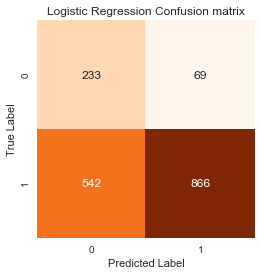

In [200]:
#Logistic regression confusion matrix
LR_cm=confusion_matrix(test_y,y_pred_int)
sns.heatmap(LR_cm,square=True,annot=True,fmt='d',cmap=plt.cm.Oranges,cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Logistic Regression Confusion matrix')

Text(0.5, 1.0, 'Base Model Confusion matrix')

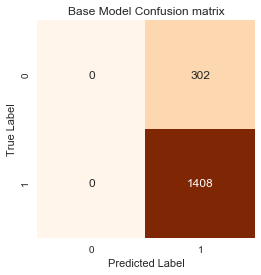

In [201]:
# Baseline model confusion matrix
Base_cm=confusion_matrix(test_y,y_base)
sns.heatmap(Base_cm,square=True,annot=True,fmt='d', cmap=plt.cm.Oranges,cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Base Model Confusion matrix')

### 4.2 Classification Report

In [202]:
#  precited model classification report
print(classification_report(test_y,y_pred_int))

              precision    recall  f1-score   support

           0       0.30      0.77      0.43       302
           1       0.93      0.62      0.74      1408

   micro avg       0.64      0.64      0.64      1710
   macro avg       0.61      0.69      0.59      1710
weighted avg       0.82      0.64      0.69      1710



In [203]:
# base model classification report
print(classification_report(test_y,y_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.82      1.00      0.90      1408

   micro avg       0.82      0.82      0.82      1710
   macro avg       0.41      0.50      0.45      1710
weighted avg       0.68      0.82      0.74      1710



//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 4.3 ROC/AUC

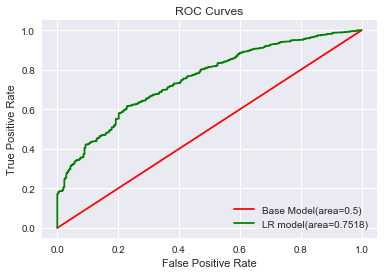

In [204]:
#measure the performance of classification model
rg_fpr,rg_tpr,_ = roc_curve(test_y, y_base)
LR_fpr, LR_tpr, _ = roc_curve(test_y,y_pred)

# Plot both curves
roc_auc_LR=round(roc_auc_score(y_true=test_y,y_score=y_pred),4)
plt.plot(rg_fpr, rg_tpr, 'r', label = 'Base Model(area=0.5)')
plt.plot(LR_fpr, LR_tpr, 'g', label = 'LR model(area={})'.format(roc_auc_LR))

plt.legend();
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');plt.title('ROC Curves');
plt.show();